In [27]:
%matplotlib inline

In [28]:
import sys
sys.path.append("/dat/matterhorn/akolle/dev/scripts/python")

In [29]:
import site
reload(site)

<module 'site' from '/dat/matterhorn/env27/lib/python2.7/site.pyc'>

In [30]:
cd /dat/matterhorn/analysis/slrl_modelselection_test

/dat/matterhorn/analysis/slrl_modelselection_test


[-0.00755599]


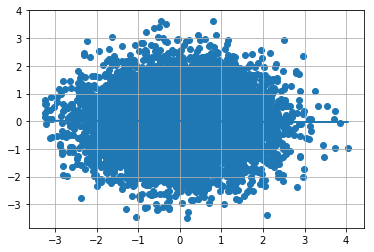

In [31]:
import numpy as np
import randomwalk
import matplotlib.pyplot as plt
import pandas as pd
Xd=[randomwalk.gaussRand(0,1) for x in range(10000)]
Yd=[randomwalk.gaussRand(0,1) for x in range(10000)]
df=pd.DataFrame()
df['X']=Xd
df['Y']=Yd
X=df[['X']]
Y=df['Y']
reparams=np.linalg.lstsq(X.values,Y.values)[0]
regvec=np.array(X).dot(reparams)
print reparams
plt.scatter(X,Y)
plt.plot(X,regvec)
plt.grid()

In [32]:
import slrlmodel_update
inddf,rawdf,modeldict=slrlmodel_update.calc_param("20200701","slrl_fixedincomefutures_slrlmodels_static.cfg","1000","100","7200","25","5Min","30Min","debug.dat","True")
#slrlmodel_update.calc_param("20200701","slrlmodels.cfg","100","100","7200","25","5Min","30Min","debug.dat","True")

load sdate: 20200215
model sdate: 20200323
edate: 20200701
strategy args_type modelID target
SLRL STATIC GMSTAT1 XLIF.R.0
[]
remove_sym: []
engine_stime engine_etime: 09:00:00 18:59:59
20170829 20200701 09:00:00 18:59:59 5Min
loading data
loading FGBL from nfs
loading R from nfs
loading FOAT from nfs
loading ZN from nfs
Model INDICATORS:
------------------------
2017-08-29 09:00:00 2020-05-26 18:55:00
Correlation: 0.733106236757
strategy args_type modelID target
SLRL STATIC GMSTAT1 XEUR.FOAT.0
[]
remove_sym: []
engine_stime engine_etime: 09:00:00 18:59:59
loading data
loading FBTP from nfs
Model INDICATORS:
------------------------
2017-08-29 09:00:00 2020-05-26 18:55:00
Correlation: 0.837456805047
strategy args_type modelID target
SLRL STATIC GMSTAT1 XCME.ZN.0
[]
remove_sym: []
engine_stime engine_etime: 12:00:00 18:59:59
loading data
loading CGB from nfs
Model INDICATORS:
------------------------
2017-08-29 09:00:00 2020-05-26 18:55:00
Correlation: 0.749923337051
function vers1 takes

Index([u'XEUR.FOAT.0', u'XLIF.R.0', u'XEUR.FGBL.0', u'XCME.ZN.0',
       u'XEUR.FBTP.0', u'XTMX.CGB.0', u'XCME.ZN.0_XTMX.CGB.0',
       u'XEUR.FOAT.0_XEUR.FGBL.0', u'XEUR.FBTP.0_XEUR.FGBL.0',
       u'XCME.ZN.0_XEUR.FGBL.0', u'XCME.ZN.0_XLIF.R.0',
       u'XEUR.FGBL.0_XLIF.R.0'],
      dtype='object')


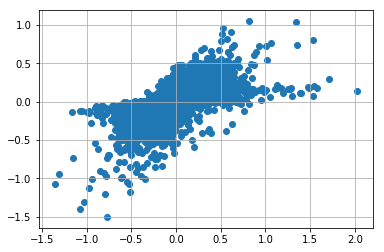

In [33]:
import numpy as np
import randomwalk
import matplotlib.pyplot as plt
import pandas as pd
print inddf.columns
plt.scatter(inddf["XLIF.R.0"],inddf["XEUR.FGBL.0"])
plt.grid()

In [34]:
print modeldict

{'XCME.ZN.0_GMSTAT1': ['XCME.ZN.0', ['XTMX.CGB.0', 'XEUR.FGBL.0', 'XEUR.FGBL.0_XLIF.R.0'], array([ 0.21395164,  0.58512873, -0.14730538]), 0.74992333705066538, 'STATIC'], 'XEUR.FOAT.0_GMSTAT1': ['XEUR.FOAT.0', ['XLIF.R.0', 'XEUR.FGBL.0', 'XEUR.FBTP.0_XEUR.FGBL.0', 'XCME.ZN.0'], array([ 0.10874285,  0.89406082,  0.16605578,  0.03592168]), 0.83745680504669762, 'STATIC'], 'XLIF.R.0_GMSTAT1': ['XLIF.R.0', ['XEUR.FOAT.0', 'XEUR.FOAT.0_XEUR.FGBL.0', 'XEUR.FGBL.0', 'XCME.ZN.0'], array([ -7.41459445e+11,   7.41459445e+11,   7.41459445e+11,
         3.67675781e-01]), 0.73310623675684694, 'STATIC']}


In [35]:
from copy import deepcopy
def data_squash(xdf,squash):
    df=deepcopy(xdf)    
    #Squash data:
    for key in df:
        sub_con=df[key]>(df[key].mean()-squash*df[key].std())
        sub_squash_val=df[key].mean()-squash*df[key].std()
        df[key].where(df[key]<(df[key].mean()+squash*df[key].std()) , df[key].mean()+squash*df[key].std() , inplace=True)
        df[key].where(sub_con, sub_squash_val, inplace=True)
    return df



In [36]:
import numpy as np
from copy import deepcopy
def data_squash_rm(xdf,squash):
    df=deepcopy(xdf)    
    #Squash data:
    for key in df:
        sub_con=df[key]>(df[key].mean()-squash*df[key].std())
        sub_squash_val=df[key].mean()-squash*df[key].std()
        add_con = df[key]<(df[key].mean()+squash*df[key].std()) 
        df[key].where(sub_con, np.nan, inplace=True)
        df[key].where(add_con, np.nan, inplace=True)
    df.dropna(inplace=True)        
        #df[key] = pd.concat([df[key][add_con],df[key][sub_con]],join="outer").drop_duplicates().reset_index(drop=True)
    return df



In [37]:
import numpy as np
from copy import deepcopy
def data_velocity_squash_rm(xdf,squash):
    df_displ=deepcopy(xdf)
    df = df_displ.pct_change(1).dropna()
    #Squash data:
    for key in df:
        sub_con=df[key]>(df[key].mean()-squash*df[key].std())
        sub_squash_val=df[key].mean()-squash*df[key].std()
        add_con = df[key]<(df[key].mean()+squash*df[key].std()) 
        df_displ[key].where(sub_con, np.nan, inplace=True)
        df_displ[key].where(add_con, np.nan, inplace=True)
    df_displ.dropna(inplace=True)        
        #df[key] = pd.concat([df[key][add_con],df[key][sub_con]],join="outer").drop_duplicates().reset_index(drop=True)
    return df_displ


In [38]:
import numpy as np
from copy import deepcopy
def data_velocity_squash_get(xdf,squash):
    sqdict=dict()
    df_displ=deepcopy(xdf)
    df = df_displ.pct_change(1).dropna()
    #Squash data:
    for key in df:
        sub_con=df[key]>(df[key].mean()-squash*df[key].std())
        sub_squash_val=df[key].mean()-squash*df[key].std()
        add_con = df[key]<(df[key].mean()+squash*df[key].std()) 
        sqdict[key] = pd.concat([df_displ[key][sub_con],df_displ[key][add_con]],axis=0).dropna()
    return sqdict


In [53]:
import numpy as np
from copy import deepcopy
def data_squash_get(xdf,squash):
    sqdict=dict()
    df=deepcopy(xdf)
    
    #Squash data:
    for key in df:
        sub_con=df[key]<(df[key].mean()-squash*df[key].std())
        sub_squash_val=df[key].mean()-squash*df[key].std()
        add_con = df[key]>(df[key].mean()+squash*df[key].std()) 
        sqdict[key] = pd.concat([df[key][sub_con],df[key][add_con]],axis=0).dropna().sort_index()
    return sqdict


In [54]:
print inddf.shape
inddf_spikes=data_squash_get(inddf,5) 
#inddf_sq=inddf 
print inddf_spikes.keys()
for key in inddf_spikes:
    print key+" "+str(min(inddf_spikes[key]))+" "+str(len(inddf_spikes[key]))
    print inddf_spikes[key].iloc[:100]

    

(51757, 12)
['XEUR.FOAT.0', 'XLIF.R.0', 'XEUR.FGBL.0', 'XEUR.FGBL.0_XLIF.R.0', 'XCME.ZN.0_XEUR.FGBL.0', 'XEUR.FBTP.0_XEUR.FGBL.0', 'XCME.ZN.0_XTMX.CGB.0', 'XEUR.FBTP.0', 'XTMX.CGB.0', 'XCME.ZN.0', 'XCME.ZN.0_XLIF.R.0', 'XEUR.FOAT.0_XEUR.FGBL.0']
XEUR.FOAT.0 -1.8085772188 250
EpochTimeStamp
2017-08-29 12:30:00   -0.614925
2017-08-29 12:35:00   -0.724416
2017-08-29 13:15:00   -0.723746
2017-08-29 13:35:00   -0.560723
2017-08-29 14:25:00    0.934089
2017-08-29 14:30:00    1.208037
2017-08-29 14:35:00    0.889038
2017-08-29 14:40:00    0.888637
2017-08-29 14:55:00   -0.597161
2017-08-29 15:40:00   -0.974150
2017-08-29 15:45:00   -0.553479
2017-08-29 15:50:00   -1.329965
2017-08-29 15:55:00   -0.734601
2017-08-29 16:00:00   -0.598217
2017-08-29 16:05:00   -1.271532
2017-08-29 16:25:00    0.690436
2017-08-29 16:45:00   -0.975232
2017-08-29 17:10:00    0.843875
2017-08-29 17:15:00    0.560004
2017-08-29 17:20:00    0.809287
2017-08-29 17:25:00    0.701576
2017-08-29 17:30:00    0.749793
2017-

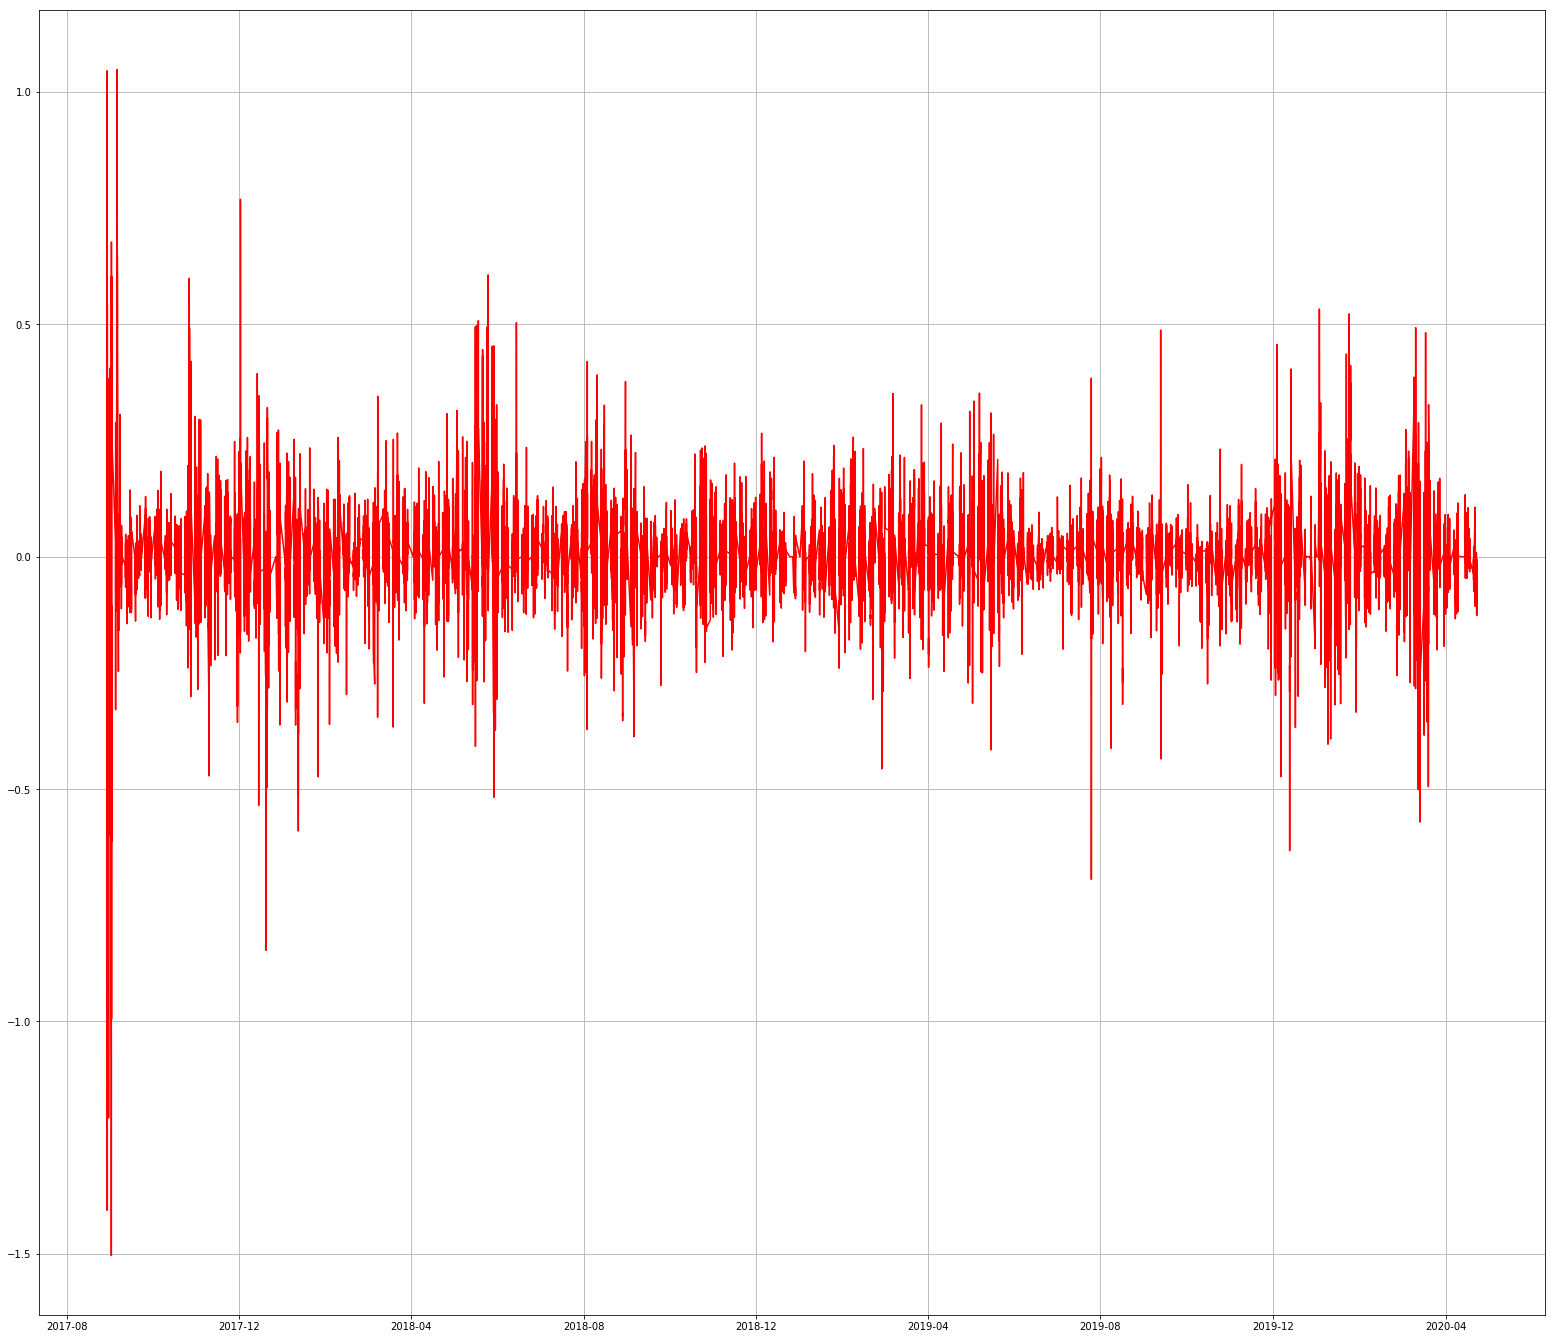

In [70]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [27, 24]
plt.plot(inddf['XEUR.FGBL.0'].iloc[:50000],'r')
plt.grid()


In [71]:
print inddf.shape
inddf_sq=data_squash_rm(inddf,5) 
#inddf_sq=inddf 
print inddf_sq.shape

(51757, 12)
(50706, 12)


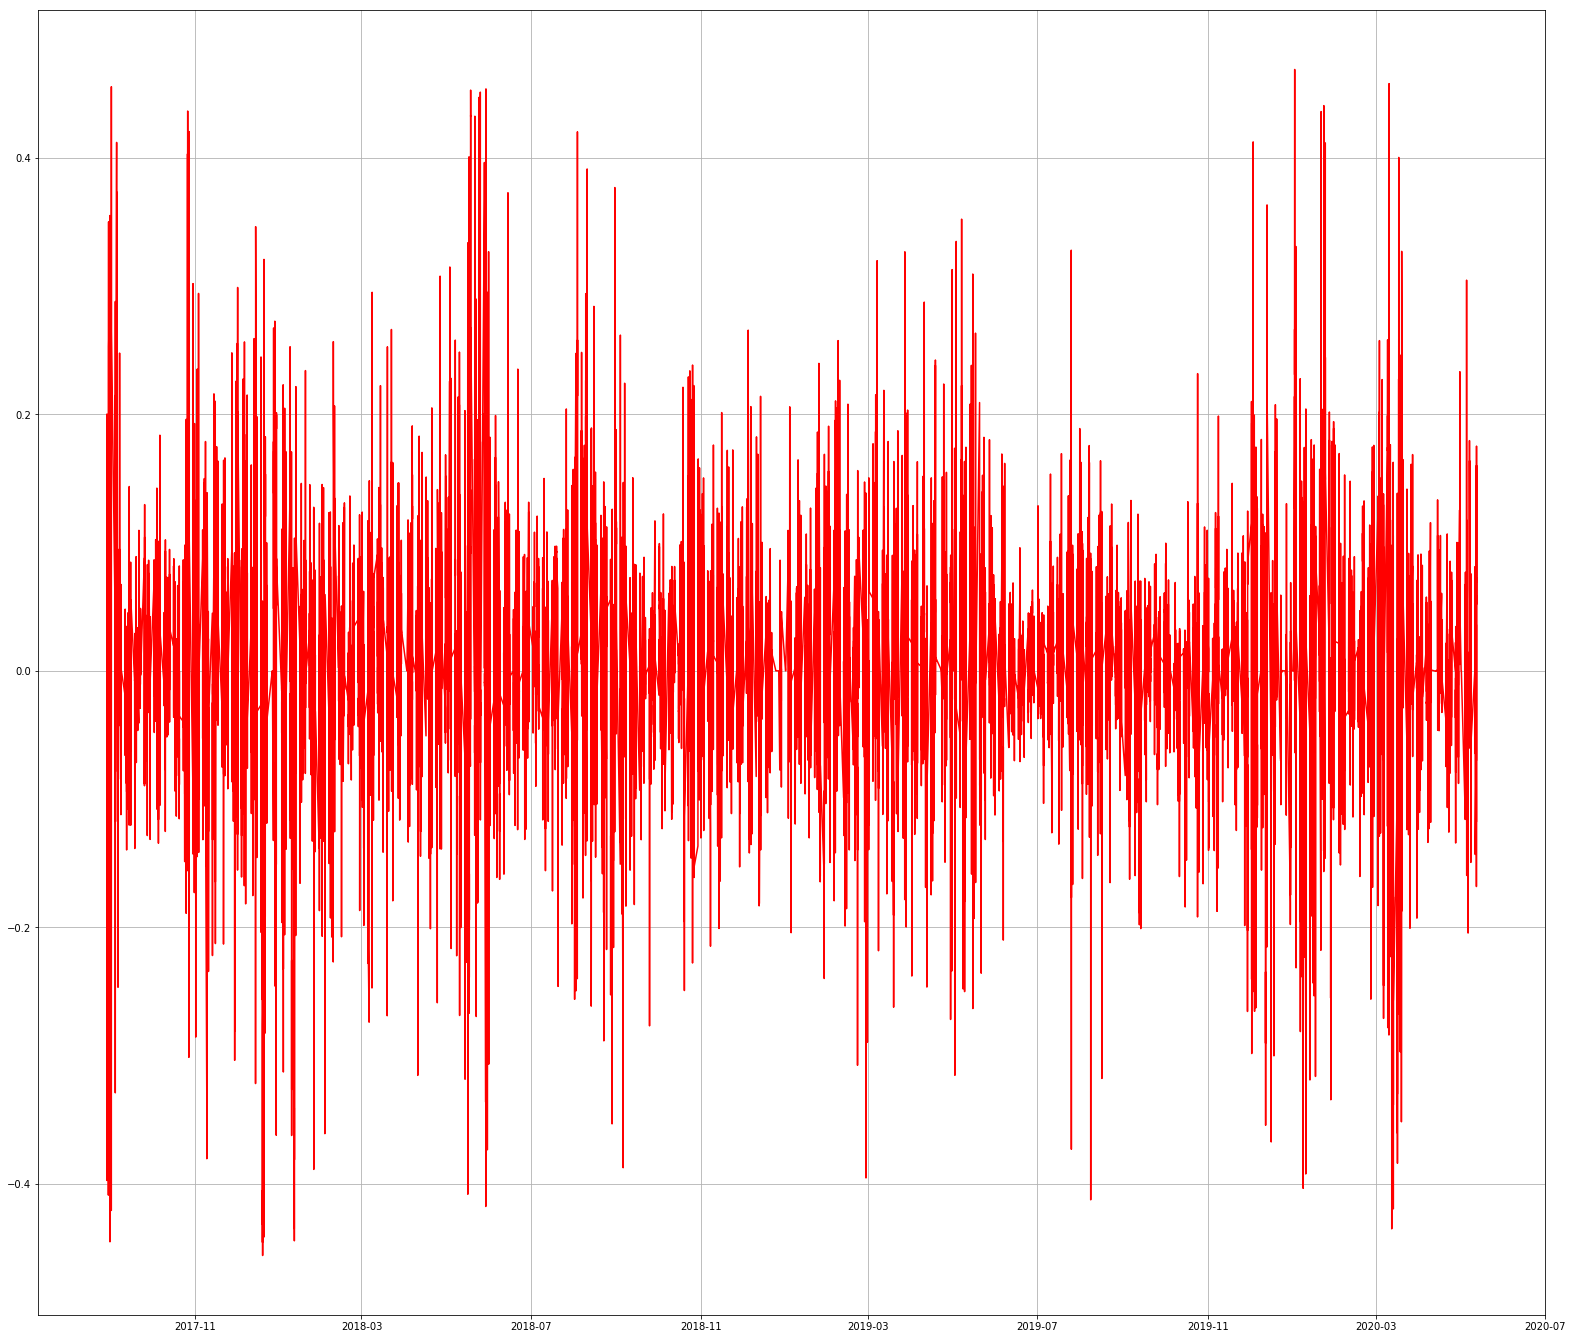

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [27, 24]
plt.plot(inddf_sq['XEUR.FGBL.0'].iloc[:50000],'r')
plt.grid()


In [14]:
import pandas as pd
sparams=modeldict['XLIF.R.0_GMSTAT1'][1]
weights=modeldict['XLIF.R.0_GMSTAT1'][2]
regdata=pd.DataFrame()
spreadweight=1
for idx in range(len(weights)):
    #print inddf_sq[sparams[idx]]
    print str(sparams[idx])+" "+str(weights[idx])
    if regdata.empty:    
        regdata['X'] = inddf_sq[sparams[idx]]*float(weights[idx])*spreadweight
    else:    
        regdata['X'] = regdata['X'] + inddf_sq[sparams[idx]]*float(weights[idx])*spreadweight
        
#print regdata        
    

XEUR.FOAT.0 -741459444992.0
XEUR.FOAT.0_XEUR.FGBL.0 741459444993.0
XEUR.FGBL.0 741459444993.0
XCME.ZN.0 0.36767578125


[ 0.98610843]


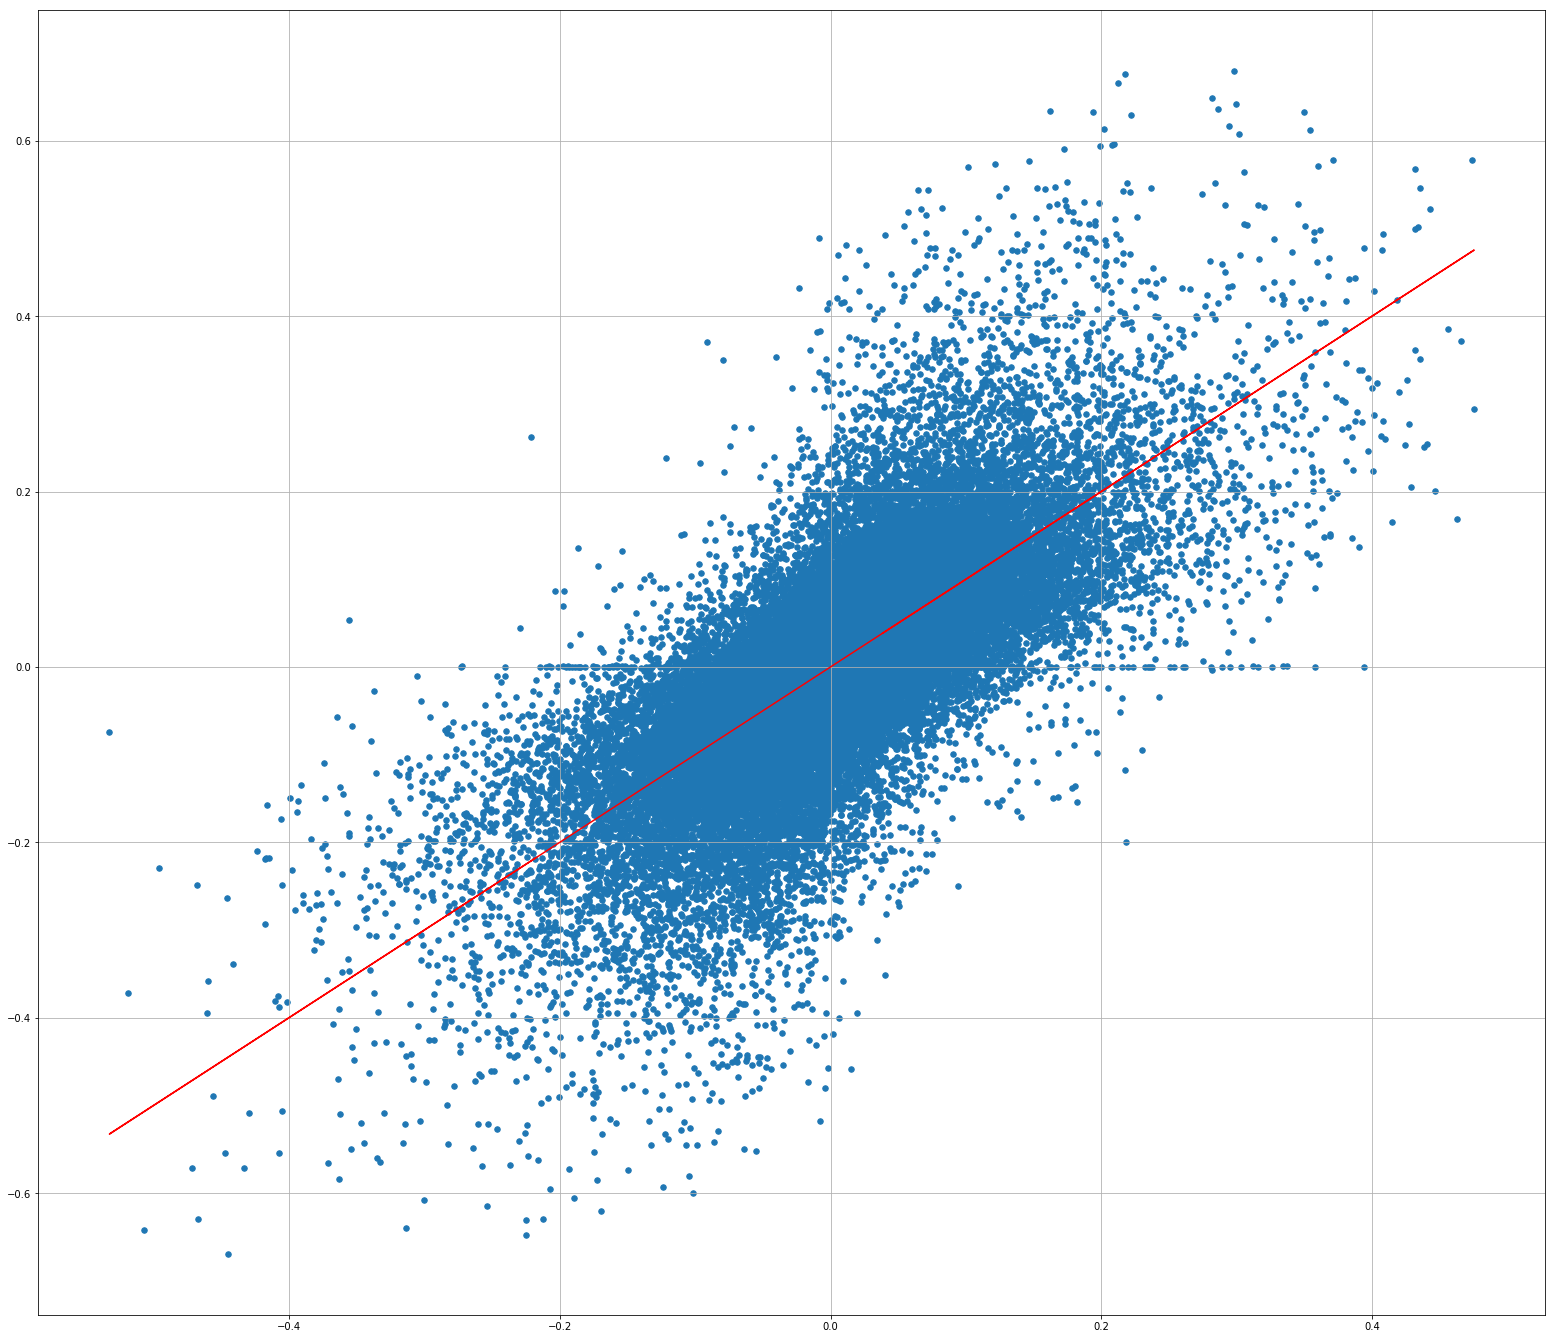

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [27, 24]
Y=inddf_sq["XLIF.R.0"]
X=1*regdata[['X']]
reparams=np.linalg.lstsq(X.values,Y.values)[0]
print reparams
regvec=np.array(X).dot([1])
plt.scatter(X,Y,s=30)
plt.plot(X,regvec*1,'r')
plt.grid()


before (1, 50706)
after (1, 50706)


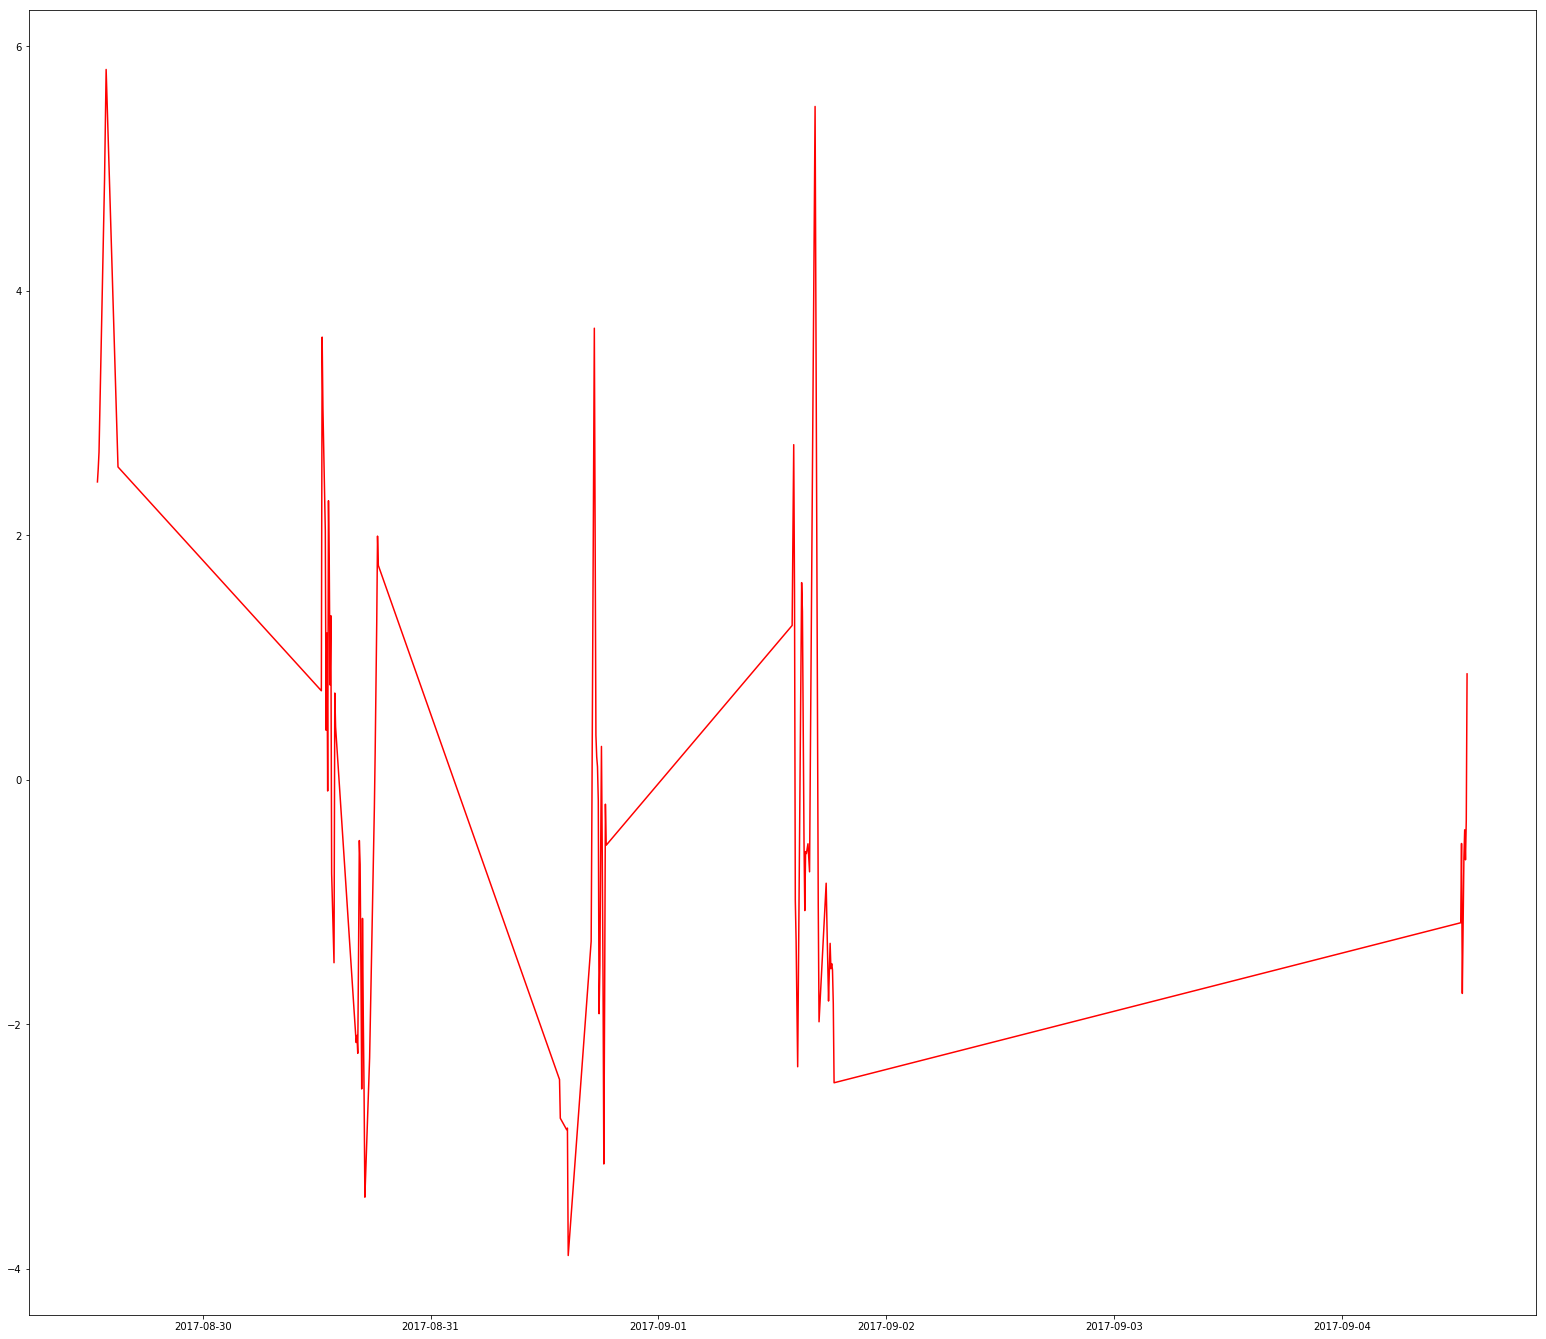

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [27, 24]
spread=Y-X.T
spread_wh=spread.T/np.std(spread.T)
print "before "+str(spread.shape)
print "after "+str(spread.dropna().shape)
plt.plot(spread_wh[:100],'r')
#plt.grid()

In [17]:
import numpy as np
print np.corrcoef(inddf_sq["XCME.6E.0"],inddf_sq["XCME.ZF.0_XEUR.FGBM.0"])[0][1]
print np.corrcoef(inddf_sq["XCME.6E.0"],inddf_sq["XCME.ES.0_XEUR.FESX.0"])[0][1]
print np.corrcoef(inddf_sq["XCME.6E.0"],inddf_sq["XCME.YM.0"])[0][1]

KeyError: 'XCME.6E.0'

In [18]:
import model_correlation_tracker as ct
corrdict=ct.calc_param("20200701","slsl_fixedincomefutures_models.cfg_slrl","1000","100","7200","25","5Min","30Min","debug.dat","True")


load start date: 20200215
load end date: 20200701
loading data
loading FOAT from nfs
loading FGBL from nfs
dfrawdata 2020-02-17 08:00:00 2020-05-26 18:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 18:55:00
AFTER 2020-02-17 08:45:00 2020-05-26 18:55:00
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20171005:20200701 Correlation: 0.816843207828
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20171004:20200630 Correlation: 0.816843207828
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20171003:20200629 Correlation: 0.816843207828
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20171002:20200628 Correlation: 0.816843207828
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20171001:20200627 Correlation: 0.816843207828
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20170930:20200626 Correlation: 0.8168432

2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20170711:20200406 Correlation: 0.81702496072
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20170710:20200405 Correlation: 0.816977047927
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20170709:20200404 Correlation: 0.816977047927
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20170708:20200403 Correlation: 0.816977047927
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20170707:20200402 Correlation: 0.817037228689
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20170706:20200401 Correlation: 0.816856603214
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20170705:20200331 Correlation: 0.817028933294
2020-02-17 08:45:00 2020-05-26 18:55:00
XEUR.FGBL.0-XEUR.FOAT.0, Date interval: 20170704:20200330 Correlation: 0.816866

XEUR.FGBL.0-XLIF.R.0, Date interval: 20170806:20200502 Correlation: 0.675084222817
2020-02-17 09:25:00 2020-05-26 18:55:00
XEUR.FGBL.0-XLIF.R.0, Date interval: 20170805:20200501 Correlation: 0.675084222817
2020-02-17 09:25:00 2020-05-26 18:55:00
XEUR.FGBL.0-XLIF.R.0, Date interval: 20170804:20200430 Correlation: 0.68090484725
2020-02-17 09:25:00 2020-05-26 18:55:00
XEUR.FGBL.0-XLIF.R.0, Date interval: 20170803:20200429 Correlation: 0.6799733634
2020-02-17 09:25:00 2020-05-26 18:55:00
XEUR.FGBL.0-XLIF.R.0, Date interval: 20170802:20200428 Correlation: 0.680798923804
2020-02-17 09:25:00 2020-05-26 18:55:00
XEUR.FGBL.0-XLIF.R.0, Date interval: 20170801:20200427 Correlation: 0.68088621056
2020-02-17 09:25:00 2020-05-26 18:55:00
XEUR.FGBL.0-XLIF.R.0, Date interval: 20170731:20200426 Correlation: 0.681239538008
2020-02-17 09:25:00 2020-05-26 18:55:00
XEUR.FGBL.0-XLIF.R.0, Date interval: 20170730:20200425 Correlation: 0.681239538008
2020-02-17 09:25:00 2020-05-26 18:55:00
XEUR.FGBL.0-XLIF.R.0

XEUR.FGBL.0-XCME.ZB.0, Date interval: 20170909:20200605 Correlation: 0.645537945272
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZB.0, Date interval: 20170908:20200604 Correlation: 0.645537945272
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZB.0, Date interval: 20170907:20200603 Correlation: 0.645537945272
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZB.0, Date interval: 20170906:20200602 Correlation: 0.645537945272
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZB.0, Date interval: 20170905:20200601 Correlation: 0.645537945272
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZB.0, Date interval: 20170904:20200531 Correlation: 0.645537945272
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZB.0, Date interval: 20170903:20200530 Correlation: 0.645537945272
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZB.0, Date interval: 20170902:20200529 Correlation: 0.645537945272
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGB

loading ZN from nfs
dfrawdata 2020-02-17 08:00:00 2020-05-26 21:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 21:55:00
AFTER 2020-02-17 10:30:00 2020-05-26 18:55:00
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20171005:20200701 Correlation: 0.662468999351
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20171004:20200630 Correlation: 0.662468999351
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20171003:20200629 Correlation: 0.662468999351
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20171002:20200628 Correlation: 0.662468999351
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20171001:20200627 Correlation: 0.662468999351
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20170930:20200626 Correlation: 0.662468999351
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20170929:202006

XEUR.FGBL.0-XCME.ZN.0, Date interval: 20170716:20200411 Correlation: 0.696412984523
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20170715:20200410 Correlation: 0.696412984523
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20170714:20200409 Correlation: 0.696412984523
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20170713:20200408 Correlation: 0.69791743248
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20170712:20200407 Correlation: 0.697706901349
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20170711:20200406 Correlation: 0.697730609526
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20170710:20200405 Correlation: 0.699466901436
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL.0-XCME.ZN.0, Date interval: 20170709:20200404 Correlation: 0.699466901436
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBL

XEUR.FGBM.0-XLIF.R.0, Date interval: 20170812:20200508 Correlation: 0.62302316456
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XLIF.R.0, Date interval: 20170811:20200507 Correlation: 0.623483739892
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XLIF.R.0, Date interval: 20170810:20200506 Correlation: 0.62394069363
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XLIF.R.0, Date interval: 20170809:20200505 Correlation: 0.6222404196
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XLIF.R.0, Date interval: 20170808:20200504 Correlation: 0.623017749977
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XLIF.R.0, Date interval: 20170807:20200503 Correlation: 0.623431412084
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XLIF.R.0, Date interval: 20170806:20200502 Correlation: 0.623431412084
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XLIF.R.0, Date interval: 20170805:20200501 Correlation: 0.623431412084
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XLIF.R.0

2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZB.0, Date interval: 20170911:20200607 Correlation: 0.553915365073
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZB.0, Date interval: 20170910:20200606 Correlation: 0.553915365073
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZB.0, Date interval: 20170909:20200605 Correlation: 0.553915365073
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZB.0, Date interval: 20170908:20200604 Correlation: 0.553915365073
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZB.0, Date interval: 20170907:20200603 Correlation: 0.553915365073
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZB.0, Date interval: 20170906:20200602 Correlation: 0.553915365073
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZB.0, Date interval: 20170905:20200601 Correlation: 0.553915365073
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZB.0, Date interval: 20170904:20200531 Correlation: 0.553915365073
2020-02-

dfrawdata 2020-02-17 08:00:00 2020-05-26 21:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 21:55:00
AFTER 2020-02-17 10:30:00 2020-05-26 18:55:00
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20171005:20200701 Correlation: 0.604770834971
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20171004:20200630 Correlation: 0.604770834971
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20171003:20200629 Correlation: 0.604770834971
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20171002:20200628 Correlation: 0.604770834971
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20171001:20200627 Correlation: 0.604770834971
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20170930:20200626 Correlation: 0.604770834971
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20170929:20200625 Correlation: 0.60

2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20170712:20200407 Correlation: 0.650216601184
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20170711:20200406 Correlation: 0.649814133941
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20170710:20200405 Correlation: 0.65063672735
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20170709:20200404 Correlation: 0.65063672735
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20170708:20200403 Correlation: 0.65063672735
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20170707:20200402 Correlation: 0.65167390613
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20170706:20200401 Correlation: 0.652526519089
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZN.0, Date interval: 20170705:20200331 Correlation: 0.652426796219
2020-02-17 1

2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZF.0, Date interval: 20170815:20200511 Correlation: 0.593959718763
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZF.0, Date interval: 20170814:20200510 Correlation: 0.59892537397
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZF.0, Date interval: 20170813:20200509 Correlation: 0.59892537397
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZF.0, Date interval: 20170812:20200508 Correlation: 0.59892537397
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZF.0, Date interval: 20170811:20200507 Correlation: 0.608080565209
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZF.0, Date interval: 20170810:20200506 Correlation: 0.616548208961
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZF.0, Date interval: 20170809:20200505 Correlation: 0.618293670338
2020-02-17 10:30:00 2020-05-26 18:55:00
XEUR.FGBM.0-XCME.ZF.0, Date interval: 20170808:20200504 Correlation: 0.617312134547
2020-02-17 

2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBS.0-XCME.ZF.0, Date interval: 20170913:20200609 Correlation: 0.501965639531
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBS.0-XCME.ZF.0, Date interval: 20170912:20200608 Correlation: 0.501965639531
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBS.0-XCME.ZF.0, Date interval: 20170911:20200607 Correlation: 0.501965639531
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBS.0-XCME.ZF.0, Date interval: 20170910:20200606 Correlation: 0.501965639531
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBS.0-XCME.ZF.0, Date interval: 20170909:20200605 Correlation: 0.501965639531
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBS.0-XCME.ZF.0, Date interval: 20170908:20200604 Correlation: 0.501965639531
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBS.0-XCME.ZF.0, Date interval: 20170907:20200603 Correlation: 0.501965639531
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBS.0-XCME.ZF.0, Date interval: 20170906:20200602 Correlation: 0.501965639531
2020-02-

loading FGBX from nfs
dfrawdata 2020-02-17 08:00:00 2020-05-26 21:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 21:55:00
AFTER 2020-02-17 10:35:00 2020-05-26 18:55:00
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20171005:20200701 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20171004:20200630 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20171003:20200629 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20171002:20200628 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20171001:20200627 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20170930:20200626 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20170929:2020

XEUR.FGBX.0-XCME.ZB.0, Date interval: 20170717:20200412 Correlation: 0.698350853217
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20170716:20200411 Correlation: 0.698350853217
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20170715:20200410 Correlation: 0.698350853217
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20170714:20200409 Correlation: 0.698350853217
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20170713:20200408 Correlation: 0.699579444139
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20170712:20200407 Correlation: 0.698681855404
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20170711:20200406 Correlation: 0.697634231001
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZB.0, Date interval: 20170710:20200405 Correlation: 0.698216301107
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGB

2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZN.0, Date interval: 20170815:20200511 Correlation: 0.673419121107
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZN.0, Date interval: 20170814:20200510 Correlation: 0.67437689561
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZN.0, Date interval: 20170813:20200509 Correlation: 0.67437689561
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZN.0, Date interval: 20170812:20200508 Correlation: 0.67437689561
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZN.0, Date interval: 20170811:20200507 Correlation: 0.676010087823
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZN.0, Date interval: 20170810:20200506 Correlation: 0.676841592153
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZN.0, Date interval: 20170809:20200505 Correlation: 0.674697741679
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FGBX.0-XCME.ZN.0, Date interval: 20170808:20200504 Correlation: 0.673226020367
2020-02-17 

XEUR.FOAT.0-XEUR.FGBL.0, Date interval: 20170915:20200611 Correlation: 0.807659248058
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XEUR.FGBL.0, Date interval: 20170914:20200610 Correlation: 0.807659248058
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XEUR.FGBL.0, Date interval: 20170913:20200609 Correlation: 0.807659248058
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XEUR.FGBL.0, Date interval: 20170912:20200608 Correlation: 0.807659248058
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XEUR.FGBL.0, Date interval: 20170911:20200607 Correlation: 0.807659248058
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XEUR.FGBL.0, Date interval: 20170910:20200606 Correlation: 0.807659248058
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XEUR.FGBL.0, Date interval: 20170909:20200605 Correlation: 0.807659248058
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XEUR.FGBL.0, Date interval: 20170908:20200604 Correlation: 0.807659248058
2020-02-17 10:35:00 2020-05-26 1

dfrawdata 2020-02-17 08:00:00 2020-05-26 21:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 21:55:00
AFTER 2020-02-17 10:35:00 2020-05-26 18:55:00
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20171005:20200701 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20171004:20200630 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20171003:20200629 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20171002:20200628 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20171001:20200627 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20170930:20200626 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20170929:20200625 Correlation: 0.558927780

XEUR.FOAT.0-XLIF.R.0, Date interval: 20170718:20200413 Correlation: 0.56456418803
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20170717:20200412 Correlation: 0.564536918522
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20170716:20200411 Correlation: 0.564536918522
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20170715:20200410 Correlation: 0.564536918522
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20170714:20200409 Correlation: 0.564536918522
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20170713:20200408 Correlation: 0.564287413973
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20170712:20200407 Correlation: 0.564089960992
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.R.0, Date interval: 20170711:20200406 Correlation: 0.562184828232
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XLIF.

2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZB.0, Date interval: 20170816:20200512 Correlation: 0.544053201071
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZB.0, Date interval: 20170815:20200511 Correlation: 0.544313063241
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZB.0, Date interval: 20170814:20200510 Correlation: 0.543351956074
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZB.0, Date interval: 20170813:20200509 Correlation: 0.543351956074
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZB.0, Date interval: 20170812:20200508 Correlation: 0.543351956074
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZB.0, Date interval: 20170811:20200507 Correlation: 0.548280197995
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZB.0, Date interval: 20170810:20200506 Correlation: 0.547928057635
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZB.0, Date interval: 20170809:20200505 Correlation: 0.545693770013
2020-02-

XEUR.FOAT.0-XCME.ZN.0, Date interval: 20170915:20200611 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZN.0, Date interval: 20170914:20200610 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZN.0, Date interval: 20170913:20200609 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZN.0, Date interval: 20170912:20200608 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZN.0, Date interval: 20170911:20200607 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZN.0, Date interval: 20170910:20200606 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZN.0, Date interval: 20170909:20200605 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOAT.0-XCME.ZN.0, Date interval: 20170908:20200604 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XEUR.FOA

dfrawdata 2020-02-17 08:00:00 2020-05-26 21:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 21:55:00
AFTER 2020-02-17 10:35:00 2020-05-26 18:55:00
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20171005:20200701 Correlation: 0.649285035348
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20171004:20200630 Correlation: 0.649285035348
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20171003:20200629 Correlation: 0.649285035348
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20171002:20200628 Correlation: 0.649285035348
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20171001:20200627 Correlation: 0.649285035348
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20170930:20200626 Correlation: 0.649285035348
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20170929:20200625 Correlation: 0.649285035

2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20170718:20200413 Correlation: 0.669512346671
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20170717:20200412 Correlation: 0.669534899897
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20170716:20200411 Correlation: 0.669534899897
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20170715:20200410 Correlation: 0.669534899897
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20170714:20200409 Correlation: 0.669534899897
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20170713:20200408 Correlation: 0.669388549152
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20170712:20200407 Correlation: 0.669576138456
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBL.0, Date interval: 20170711:20200406 Correlation: 0.668630029258
2020-02-17 10:35

2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBM.0, Date interval: 20170816:20200512 Correlation: 0.61907433377
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBM.0, Date interval: 20170815:20200511 Correlation: 0.621016588254
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBM.0, Date interval: 20170814:20200510 Correlation: 0.625341811122
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBM.0, Date interval: 20170813:20200509 Correlation: 0.625341811122
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBM.0, Date interval: 20170812:20200508 Correlation: 0.625341811122
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBM.0, Date interval: 20170811:20200507 Correlation: 0.625825866063
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBM.0, Date interval: 20170810:20200506 Correlation: 0.626271787864
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FGBM.0, Date interval: 20170809:20200505 Correlation: 0.624510666747
2020-02-17 10:35:

XLIF.R.0-XEUR.FOAT.0, Date interval: 20170915:20200611 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FOAT.0, Date interval: 20170914:20200610 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FOAT.0, Date interval: 20170913:20200609 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FOAT.0, Date interval: 20170912:20200608 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FOAT.0, Date interval: 20170911:20200607 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FOAT.0, Date interval: 20170910:20200606 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FOAT.0, Date interval: 20170909:20200605 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FOAT.0, Date interval: 20170908:20200604 Correlation: 0.558927780031
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XEUR.FO

dfrawdata 2020-02-17 08:00:00 2020-05-26 21:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 21:55:00
AFTER 2020-02-17 10:35:00 2020-05-26 18:55:00
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20171005:20200701 Correlation: 0.604485265174
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20171004:20200630 Correlation: 0.604485265174
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20171003:20200629 Correlation: 0.604485265174
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20171002:20200628 Correlation: 0.604485265174
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20171001:20200627 Correlation: 0.604485265174
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20170930:20200626 Correlation: 0.604485265174
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20170929:20200625 Correlation: 0.604485265174
2020-02-17

XLIF.R.0-XCME.ZB.0, Date interval: 20170718:20200413 Correlation: 0.619024305378
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20170717:20200412 Correlation: 0.620444943254
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20170716:20200411 Correlation: 0.620444943254
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20170715:20200410 Correlation: 0.620444943254
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20170714:20200409 Correlation: 0.620444943254
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20170713:20200408 Correlation: 0.621264174255
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20170712:20200407 Correlation: 0.622846584424
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interval: 20170711:20200406 Correlation: 0.622248694467
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZB.0, Date interva

2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZN.0, Date interval: 20170816:20200512 Correlation: 0.587652148557
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZN.0, Date interval: 20170815:20200511 Correlation: 0.588008318866
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZN.0, Date interval: 20170814:20200510 Correlation: 0.585136269959
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZN.0, Date interval: 20170813:20200509 Correlation: 0.585136269959
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZN.0, Date interval: 20170812:20200508 Correlation: 0.585136269959
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZN.0, Date interval: 20170811:20200507 Correlation: 0.597938408163
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZN.0, Date interval: 20170810:20200506 Correlation: 0.597728835419
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZN.0, Date interval: 20170809:20200505 Correlation: 0.595610050299
2020-02-17 10:35:00 2020-05-26 1

XLIF.R.0-XCME.ZF.0, Date interval: 20170915:20200611 Correlation: 0.530424912583
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZF.0, Date interval: 20170914:20200610 Correlation: 0.530424912583
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZF.0, Date interval: 20170913:20200609 Correlation: 0.530424912583
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZF.0, Date interval: 20170912:20200608 Correlation: 0.530424912583
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZF.0, Date interval: 20170911:20200607 Correlation: 0.530424912583
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZF.0, Date interval: 20170910:20200606 Correlation: 0.530424912583
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZF.0, Date interval: 20170909:20200605 Correlation: 0.530424912583
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZF.0, Date interval: 20170908:20200604 Correlation: 0.530424912583
2020-02-17 10:35:00 2020-05-26 18:55:00
XLIF.R.0-XCME.ZF.0, Date interva

dfrawdata 2020-02-17 08:00:00 2020-05-26 21:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 21:55:00
AFTER 2020-02-17 10:35:00 2020-05-26 18:55:00
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20171005:20200701 Correlation: 0.637732791287
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20171004:20200630 Correlation: 0.637732791287
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20171003:20200629 Correlation: 0.637732791287
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20171002:20200628 Correlation: 0.637732791287
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20171001:20200627 Correlation: 0.637732791287
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20170930:20200626 Correlation: 0.637732791287
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20170929:20200625 Correlation: 0.63

XCME.ZB.0-XEUR.FGBL.0, Date interval: 20170718:20200413 Correlation: 0.670364753558
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20170717:20200412 Correlation: 0.672162599679
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20170716:20200411 Correlation: 0.672162599679
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20170715:20200410 Correlation: 0.672162599679
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20170714:20200409 Correlation: 0.672162599679
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20170713:20200408 Correlation: 0.67390893951
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20170712:20200407 Correlation: 0.673738070324
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBL.0, Date interval: 20170711:20200406 Correlation: 0.673553085696
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0

2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBM.0, Date interval: 20170815:20200511 Correlation: 0.547704709548
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBM.0, Date interval: 20170814:20200510 Correlation: 0.548563174648
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBM.0, Date interval: 20170813:20200509 Correlation: 0.548563174648
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBM.0, Date interval: 20170812:20200508 Correlation: 0.548563174648
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBM.0, Date interval: 20170811:20200507 Correlation: 0.556881033062
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBM.0, Date interval: 20170810:20200506 Correlation: 0.559012234473
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBM.0, Date interval: 20170809:20200505 Correlation: 0.56284751896
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBM.0, Date interval: 20170808:20200504 Correlation: 0.562848233733
2020-02-1

2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBX.0, Date interval: 20170914:20200610 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBX.0, Date interval: 20170913:20200609 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBX.0, Date interval: 20170912:20200608 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBX.0, Date interval: 20170911:20200607 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBX.0, Date interval: 20170910:20200606 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBX.0, Date interval: 20170909:20200605 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBX.0, Date interval: 20170908:20200604 Correlation: 0.678400255706
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FGBX.0, Date interval: 20170907:20200603 Correlation: 0.678400255706
2020-02-

dfrawdata 2020-02-17 08:00:00 2020-05-26 21:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 21:55:00
AFTER 2020-02-17 10:35:00 2020-05-26 18:55:00
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20171005:20200701 Correlation: 0.544500488006
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20171004:20200630 Correlation: 0.544500488006
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20171003:20200629 Correlation: 0.544500488006
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20171002:20200628 Correlation: 0.544500488006
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20171001:20200627 Correlation: 0.544500488006
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20170930:20200626 Correlation: 0.544500488006
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20170929:20200625 Correlation: 0.54

XCME.ZB.0-XEUR.FOAT.0, Date interval: 20170717:20200412 Correlation: 0.584959619329
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20170716:20200411 Correlation: 0.584959619329
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20170715:20200410 Correlation: 0.584959619329
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20170714:20200409 Correlation: 0.584959619329
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20170713:20200408 Correlation: 0.587937591673
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20170712:20200407 Correlation: 0.588238555693
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20170711:20200406 Correlation: 0.587334826016
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XEUR.FOAT.0, Date interval: 20170710:20200405 Correlation: 0.588914760362
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.

XCME.ZB.0-XLIF.R.0, Date interval: 20170812:20200508 Correlation: 0.585719363498
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XLIF.R.0, Date interval: 20170811:20200507 Correlation: 0.601154529151
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XLIF.R.0, Date interval: 20170810:20200506 Correlation: 0.599847349898
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XLIF.R.0, Date interval: 20170809:20200505 Correlation: 0.604326014456
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XLIF.R.0, Date interval: 20170808:20200504 Correlation: 0.603227387103
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XLIF.R.0, Date interval: 20170807:20200503 Correlation: 0.607726715104
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XLIF.R.0, Date interval: 20170806:20200502 Correlation: 0.607726715104
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XLIF.R.0, Date interval: 20170805:20200501 Correlation: 0.607726715104
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZB.0-XLIF.R.0, Date interva

XCME.ZN.0-XEUR.FGBL.0, Date interval: 20170913:20200609 Correlation: 0.655882663312
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBL.0, Date interval: 20170912:20200608 Correlation: 0.655882663312
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBL.0, Date interval: 20170911:20200607 Correlation: 0.655882663312
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBL.0, Date interval: 20170910:20200606 Correlation: 0.655882663312
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBL.0, Date interval: 20170909:20200605 Correlation: 0.655882663312
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBL.0, Date interval: 20170908:20200604 Correlation: 0.655882663312
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBL.0, Date interval: 20170907:20200603 Correlation: 0.655882663312
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBL.0, Date interval: 20170906:20200602 Correlation: 0.655882663312
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.

dfrawdata 2020-02-17 08:00:00 2020-05-26 21:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 21:55:00
AFTER 2020-02-17 10:35:00 2020-05-26 18:55:00
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20171005:20200701 Correlation: 0.604633627887
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20171004:20200630 Correlation: 0.604633627887
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20171003:20200629 Correlation: 0.604633627887
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20171002:20200628 Correlation: 0.604633627887
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20171001:20200627 Correlation: 0.604633627887
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20170930:20200626 Correlation: 0.604633627887
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20170929:20200625 Correlation: 0.60

XCME.ZN.0-XEUR.FGBM.0, Date interval: 20170713:20200408 Correlation: 0.650580429628
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20170712:20200407 Correlation: 0.651156481768
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20170711:20200406 Correlation: 0.650706641172
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20170710:20200405 Correlation: 0.651526952752
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20170709:20200404 Correlation: 0.651526952752
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20170708:20200403 Correlation: 0.651526952752
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20170707:20200402 Correlation: 0.652593519518
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBM.0, Date interval: 20170706:20200401 Correlation: 0.653474827272
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.

XCME.ZN.0-XEUR.FGBX.0, Date interval: 20170812:20200508 Correlation: 0.67437689561
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBX.0, Date interval: 20170811:20200507 Correlation: 0.676010087823
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBX.0, Date interval: 20170810:20200506 Correlation: 0.676841592153
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBX.0, Date interval: 20170809:20200505 Correlation: 0.674697741679
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBX.0, Date interval: 20170808:20200504 Correlation: 0.673226020367
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBX.0, Date interval: 20170807:20200503 Correlation: 0.676423636299
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBX.0, Date interval: 20170806:20200502 Correlation: 0.676423636299
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FGBX.0, Date interval: 20170805:20200501 Correlation: 0.676423636299
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0

XCME.ZN.0-XEUR.FOAT.0, Date interval: 20170913:20200609 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FOAT.0, Date interval: 20170912:20200608 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FOAT.0, Date interval: 20170911:20200607 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FOAT.0, Date interval: 20170910:20200606 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FOAT.0, Date interval: 20170909:20200605 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FOAT.0, Date interval: 20170908:20200604 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FOAT.0, Date interval: 20170907:20200603 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XEUR.FOAT.0, Date interval: 20170906:20200602 Correlation: 0.569948240878
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.

dfrawdata 2020-02-17 08:00:00 2020-05-26 21:55:00
BEFORE 2020-02-17 08:00:00 2020-05-26 21:55:00
AFTER 2020-02-17 10:35:00 2020-05-26 18:55:00
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20171005:20200701 Correlation: 0.601384125983
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20171004:20200630 Correlation: 0.601384125983
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20171003:20200629 Correlation: 0.601384125983
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20171002:20200628 Correlation: 0.601384125983
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20171001:20200627 Correlation: 0.601384125983
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20170930:20200626 Correlation: 0.601384125983
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20170929:20200625 Correlation: 0.601384125983
2020-02-17

2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20170710:20200405 Correlation: 0.607215899165
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20170709:20200404 Correlation: 0.607215899165
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20170708:20200403 Correlation: 0.607215899165
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20170707:20200402 Correlation: 0.608076420958
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20170706:20200401 Correlation: 0.608039423637
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20170705:20200331 Correlation: 0.608150980027
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20170704:20200330 Correlation: 0.608147973475
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZN.0-XLIF.R.0, Date interval: 20170703:20200329 Correlation: 0.607729800948
2020-02-17 10:35:00 2020-05-26 1

XCME.ZF.0-XEUR.FGBM.0, Date interval: 20170812:20200508 Correlation: 0.595290117611
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBM.0, Date interval: 20170811:20200507 Correlation: 0.604630143175
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBM.0, Date interval: 20170810:20200506 Correlation: 0.613280615395
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBM.0, Date interval: 20170809:20200505 Correlation: 0.615039416396
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBM.0, Date interval: 20170808:20200504 Correlation: 0.613990039397
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBM.0, Date interval: 20170807:20200503 Correlation: 0.617289588885
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBM.0, Date interval: 20170806:20200502 Correlation: 0.617289588885
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBM.0, Date interval: 20170805:20200501 Correlation: 0.617289588885
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.

XCME.ZF.0-XEUR.FGBS.0, Date interval: 20170913:20200609 Correlation: 0.500935932097
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBS.0, Date interval: 20170912:20200608 Correlation: 0.500935932097
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBS.0, Date interval: 20170911:20200607 Correlation: 0.500935932097
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBS.0, Date interval: 20170910:20200606 Correlation: 0.500935932097
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBS.0, Date interval: 20170909:20200605 Correlation: 0.500935932097
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBS.0, Date interval: 20170908:20200604 Correlation: 0.500935932097
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBS.0, Date interval: 20170907:20200603 Correlation: 0.500935932097
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.0-XEUR.FGBS.0, Date interval: 20170906:20200602 Correlation: 0.500935932097
2020-02-17 10:35:00 2020-05-26 18:55:00
XCME.ZF.

In [22]:
corrdict.keys()

['XEUR.FGBX.0-XCME.ZB.0',
 'XEUR.FOAT.0-XCME.ZB.0',
 'XLIF.R.0-XCME.ZN.0',
 'XEUR.FOAT.0-XEUR.FGBL.0',
 'XEUR.FGBM.0-XLIF.R.0',
 'XCME.ZB.0-XEUR.FOAT.0',
 'XEUR.FGBL.0-XEUR.FOAT.0',
 'XEUR.FGBX.0-XCME.ZN.0',
 'XEUR.FGBM.0-XCME.ZN.0',
 'XCME.ZB.0-XLIF.R.0',
 'XLIF.R.0-XEUR.FOAT.0',
 'XLIF.R.0-XCME.ZB.0',
 'XEUR.FGBM.0-XCME.ZF.0',
 'XEUR.FOAT.0-XLIF.R.0',
 'XCME.ZN.0-XEUR.FGBL.0',
 'XEUR.FGBL.0-XLIF.R.0',
 'XCME.ZB.0-XEUR.FGBM.0',
 'XCME.ZB.0-XEUR.FGBL.0',
 'XEUR.FOAT.0-XCME.ZN.0',
 'XCME.ZF.0-XEUR.FGBM.0',
 'XEUR.FGBL.0-XCME.ZN.0',
 'XLIF.R.0-XCME.ZF.0',
 'XEUR.FGBL.0-XCME.ZB.0',
 'XCME.ZN.0-XEUR.FGBM.0',
 'XLIF.R.0-XEUR.FGBM.0',
 'XLIF.R.0-XEUR.FGBL.0',
 'XCME.ZN.0-XLIF.R.0',
 'XEUR.FGBM.0-XCME.ZB.0',
 'XEUR.FGBS.0-XCME.ZF.0',
 'XCME.ZN.0-XEUR.FOAT.0',
 'XCME.ZB.0-XEUR.FGBX.0',
 'XCME.ZF.0-XEUR.FGBS.0',
 'XCME.ZN.0-XEUR.FGBX.0']

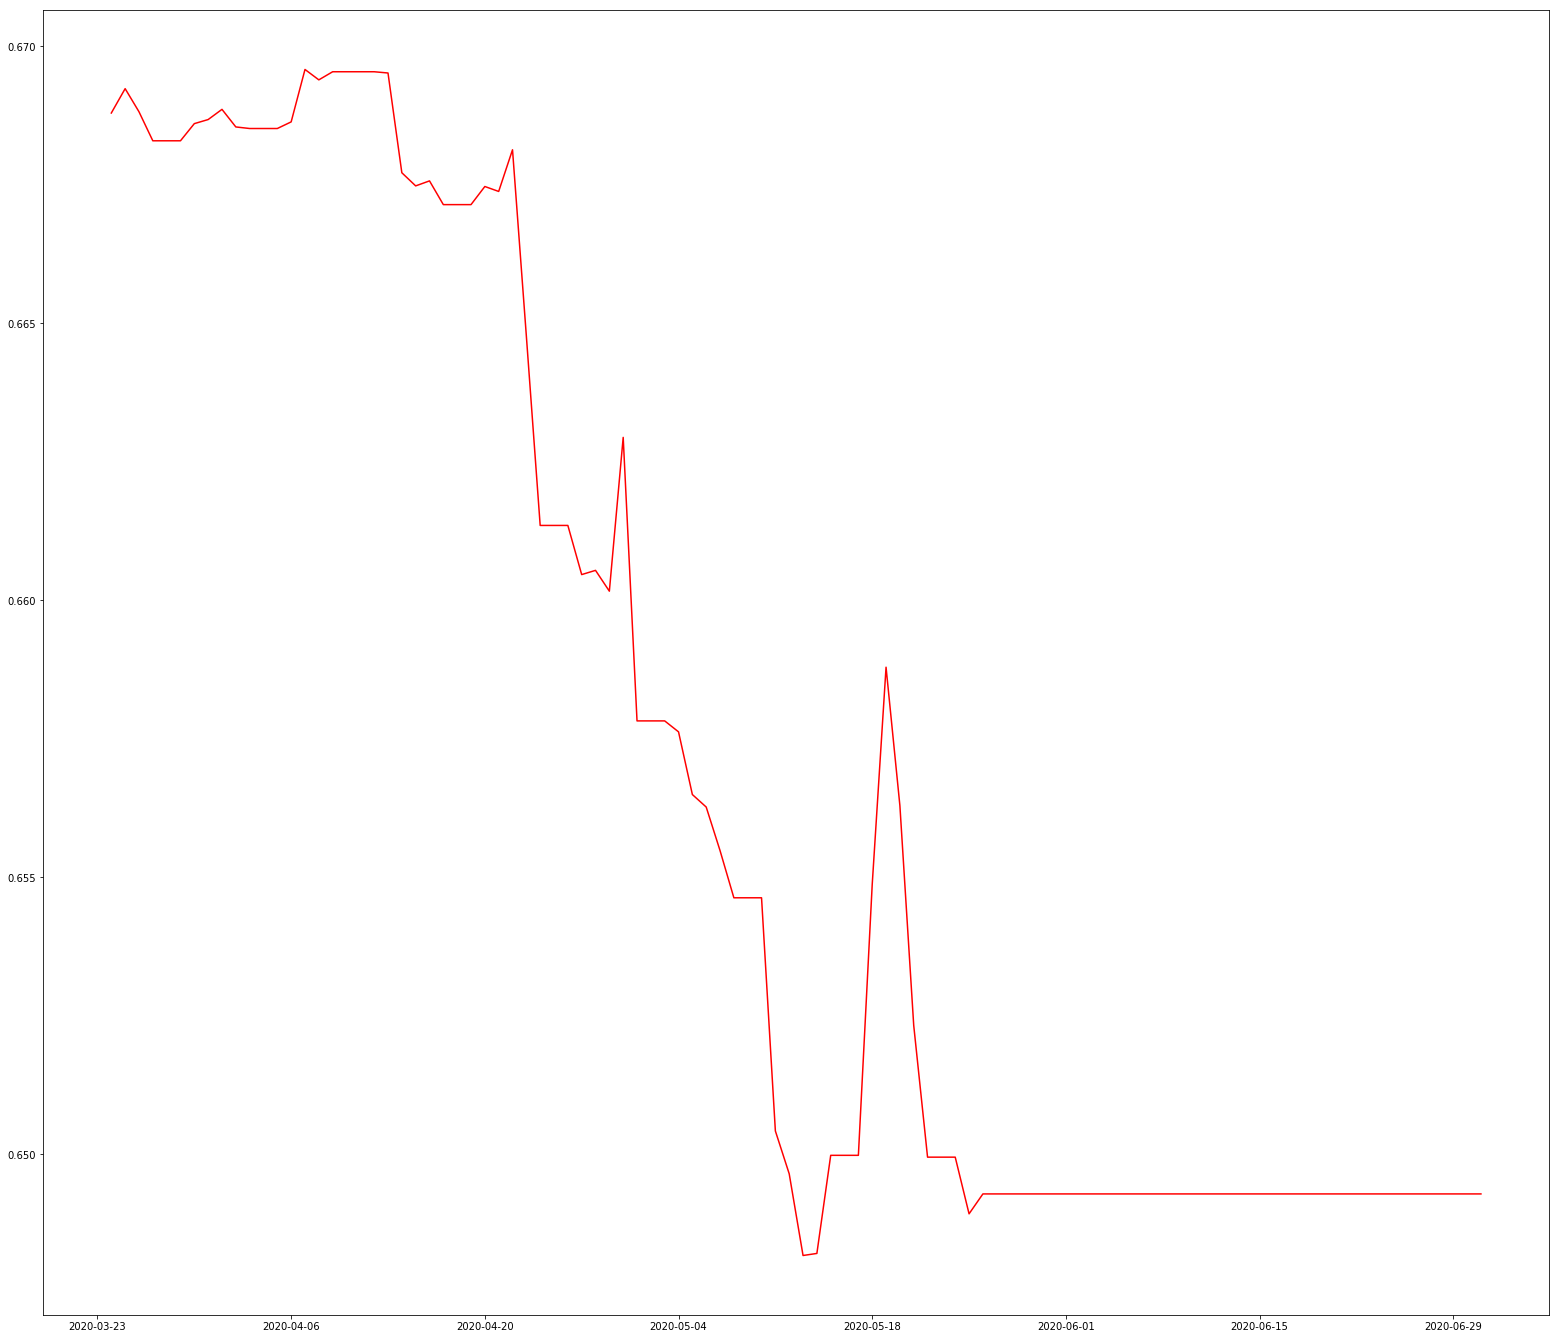

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [27, 24]
plt.plot(corrdict['XLIF.R.0-XEUR.FGBL.0'],'r')
#plt.grid()

In [24]:
corrdict['XLIF.R.0-XEUR.FGBL.0']

2020-07-01    0.649285
2020-06-30    0.649285
2020-06-29    0.649285
2020-06-28    0.649285
2020-06-27    0.649285
2020-06-26    0.649285
2020-06-25    0.649285
2020-06-24    0.649285
2020-06-23    0.649285
2020-06-22    0.649285
2020-06-21    0.649285
2020-06-20    0.649285
2020-06-19    0.649285
2020-06-18    0.649285
2020-06-17    0.649285
2020-06-16    0.649285
2020-06-15    0.649285
2020-06-14    0.649285
2020-06-13    0.649285
2020-06-12    0.649285
2020-06-11    0.649285
2020-06-10    0.649285
2020-06-09    0.649285
2020-06-08    0.649285
2020-06-07    0.649285
2020-06-06    0.649285
2020-06-05    0.649285
2020-06-04    0.649285
2020-06-03    0.649285
2020-06-02    0.649285
                ...   
2020-04-22    0.668127
2020-04-21    0.667375
2020-04-20    0.667464
2020-04-19    0.667137
2020-04-18    0.667137
2020-04-17    0.667137
2020-04-16    0.667565
2020-04-15    0.667475
2020-04-14    0.667712
2020-04-13    0.669512
2020-04-12    0.669535
2020-04-11    0.669535
2020-04-10 